In [307]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
#sklearn.metrics.pairwise.rbf_kernel(X, Y=None, gamma=None)

500
(500,)


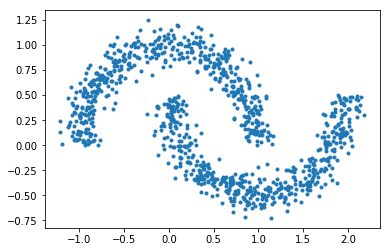

(1000, 2)


In [767]:
mu = 0
sigma = 1
sampleNo = 500
np.random.seed(0)
r1 = 1 + 0.1 *np.random.normal(mu, sigma, sampleNo )
r2 =1 + 0.1 * np.random.normal(mu, sigma, sampleNo) 
q1 = np.random.random(size=sampleNo)  * np.pi
q2 = - np.random.random(size=sampleNo)  * np.pi
x1,x2 = np.array(r1 * np.cos(q1)),np.array(r2 * np.cos(q2)) + 1
x = np.concatenate((x1,x2))
y1, y2 = np.array(r1 * np.sin(q1)), np.array(r2 * np.sin(q2)) + 0.5
y = np.concatenate((y1,y2))
print(r1.shape[0])
print(r2.shape)
plt.plot(x,y,'.')
plt.show()
data = np.dstack((x,y))[0]
print(data.shape)

X, y = datasets.make_blobs(n_samples=1000, centers=2,random_state=0)
x,y = np.hsplit(X, 2)
x = np.reshape(x,(x.shape[0],))
y = np.reshape(y,(x.shape[0],))
#print(x,y)
plt.plot(x,y,'.')
plt.show()

500
(500,)


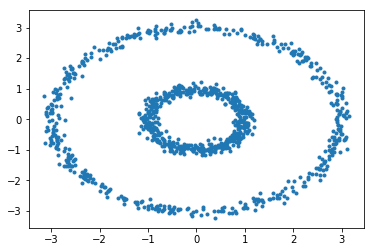

(1000, 2)


In [736]:
mu = 0
sigma = 1
sampleNo = 500
np.random.seed(0)
r1 = 1 + 0.1 *np.random.normal(mu, sigma, sampleNo )
r2 =3 + 0.1 * np.random.normal(mu, sigma, sampleNo)
q1 = np.random.random(size=sampleNo) * 2 * np.pi
q2 = np.random.random(size=sampleNo) * 2 * np.pi
x1,x2 = np.array(r1 * np.cos(q1)),np.array(r2 * np.cos(q2)) 
x = np.concatenate((x1,x2))
y1, y2 = np.array(r1 * np.sin(q1)), np.array(r2 * np.sin(q2))
y = np.concatenate((y1,y2))
print(r1.shape[0])
print(r2.shape)
plt.plot(x,y,'.')
plt.show()
data = np.dstack((x,y))[0]
print(data.shape)

500
(500,)


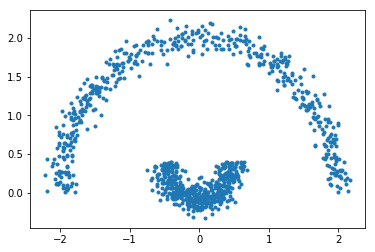

(1000, 2)


In [740]:
mu = 0
sigma = 1
sampleNo = 500
np.random.seed(0)
r1 = 2 + 0.1 *np.random.normal(mu, sigma, sampleNo )
r2 = 0.5  + 0.1 * np.random.normal(mu, sigma, sampleNo) 
q1 = np.random.random(size=sampleNo)  * np.pi 
q2 =  np.random.random(size=sampleNo)  * np.pi 
x1,x2 = np.array(r1 * np.cos(q1)),np.array(r2 * np.cos(q2)) 
x = np.concatenate((x1,x2))
y1, y2 = np.array(r1 * np.sin(q1)) , -np.array(r2 * np.sin(q2)) + 0.4
y = np.concatenate((y1,y2))
print(r1.shape[0])
print(r2.shape)
plt.plot(x,y,'.')
plt.show()
data = np.dstack((x,y))[0]
print(data.shape)

X,y = datasets.make_biclusters(shape = (1000,2), n_clusters = 1, noise=0.0, minval=10, maxval=100, shuffle=True, random_state=None)
x,y = np.hsplit(X, 2)
x = np.reshape(x,(x.shape[0],))
y = np.reshape(y,(x.shape[0],))
#print(x,y)
plt.plot(x,y,'.')
plt.show()

X,y = datasets.make_circles(n_samples=1000, shuffle=False, noise=0.04, random_state=True, factor=0.5)
x,y = np.hsplit(X, 2)
x = np.reshape(x,(x.shape[0],))
y = np.reshape(y,(x.shape[0],))
#print(x,y)
plt.plot(x,y,'.')
plt.show()

X,y = datasets.make_s_curve(n_samples=1000, noise=0.2, random_state=None)
x,y,z = np.hsplit(X, 3)
x = np.reshape(x,(x.shape[0],))
z = np.reshape(y,(x.shape[0],))
#print(x,y)
plt.plot(x,z,'.')
plt.show()

sampleNo, dim = data.shape
z= np.zeros((sampleNo, 2))
alpha = z / np.sum(z, axis = 0)
print(alpha.shape)
print(alpha)

In [647]:
def linear_kernel(x,y,c):
    return np.dot(x.T, y)+c


kernel = linear_kernel
sum = 0
for i in range(sampleNo):
    for k in range(sampleNo):
        sum += kernel(data[i], data[k].T)
print(np.sum(kernel(data[0], data.T)))
print(sum)
print(np.sum(kernel(data.T,data.T)))

In [754]:
def quadratic_kernel(x,y, c):
    return (np.dot( x.T, y + c))**2

In [722]:
def rbf_kernel(x,y, l):
    return np.exp(-l/2 * np.linalg.norm(x-y) ** 2)

In [657]:
def initParameter(data, k):
    sampleNo, dim = data.shape
    clusterAss = np.zeros((sampleNo, 2))
    for i in range(sampleNo):
        clusterAss[i][1] = np.random.randint(0,k)
    
    return clusterAss

index = clusterAss[:,1] == 1
x_cj = data[index]
pi_cj = len(x_cj)
print(x_cj.shape)
print(np.sum(kernel(data[0], x_cj.T)))
sum = 0
for i in range(pi_cj):
    sum += kernel(data[0],x_cj[i])
print(sum)
print(np.sum(kernel(x_cj.T, x_cj.T)))
sum = 0
for i in range(pi_cj):
    for j in range(pi_cj):
        sum += kernel(x_cj[i],x_cj[j])
print(sum)

In [658]:
def kernelized_kmeans(data,k, kernel,c):
    sampleNo, dim = data.shape
    #z, alpha = initParameter(data, k)
    clusterAss = initParameter(data, k)# first column is the distance, second is cluster number
    change = True
    while change:
        
        change = False
        for i in range(sampleNo): # find the closest center
            min_dist = 10000
            min_index = 0
            for j in range(k):
                index = clusterAss[:,1] == j
                x_cj = data[index]
                pi_cj = len(x_cj)
                x = np.reshape(data[i],(2,1))
                #print(x.shape)
                dist = kernel(x,x,c) - 2 * np.sum(kernel(x, x_cj.T,c)) / pi_cj + np.sum(kernel(x_cj.T, x_cj.T,c))/ pi_cj**2 
                if dist < min_dist:
                    min_dist = dist
                    min_index = j
            #print(min_dist)
            if min_index != clusterAss[i][1]:
                    change = True
                    clusterAss[i][0] = min_dist
                    clusterAss[i][1] = min_index
                    #z[i][min_index] = 1
                    #alpha = z / np.sum(z, axis = 0)
    print(np.sum(clusterAss[:,0]))
    return clusterAss

In [659]:
def plotResult(x, y, clusterAss,k):
    color = ['#000000', 'r','#F5F5DC','#FFE4C4']
    for i in range(k):
        index = clusterAss[:,1] == i
        plt.plot(x[index], y[index],'.', color = color[i])
        #plt.plot(center[i][0], center[i][1], '*', color = 'k', markersize = 10)
    plt.show()

def gridSearch(kernel, parameter, data, k):
    min_loss = 2000
    best_cluster = initParameter(data, k)
    best_parameter = 0
    for i,c in enumerate(parameter):
        clusterAss= kernelized_kmeans(data, k, kernel,c)
        loss = np.sum(clusterAss[:,0])
        if loss < min_loss:
            best_parameter = c
            min_loss = loss
            best_cluster = clusterAss
        return best_parameter, best_cluster

parameter = [-7,-5]
k = 2
c1, clusterAss1 = gridSearch(linear_kernel, parameter, data, k)
print(clusterAss1)
print(c1)

3
298.533843044


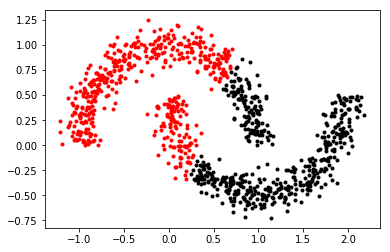

0
301.936214107


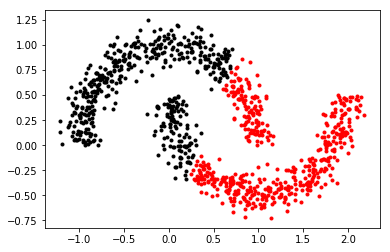

-3
314.053491418


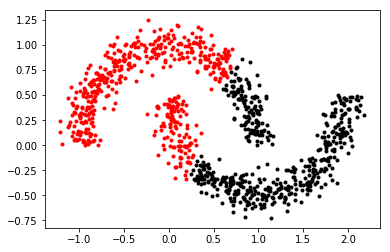

-5
308.90860723


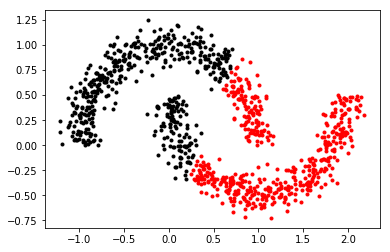

In [776]:
parameter = [3,0,-3,-5]
for c in parameter:
    print(c)
    clusterAss1 = kernelized_kmeans(data, 2, linear_kernel,c)
    plotResult(x, y, clusterAss1, 2)

In [775]:
parameter = [-0.7,1,0]
for a in parameter:
    print(a)
    clusterAss2 = kernelized_kmeans(data, 2, quadratic_kernel,a)
    plotResult(x, y, clusterAss2, 2)


-0.7


KeyboardInterrupt: 

0.17
601.931769324


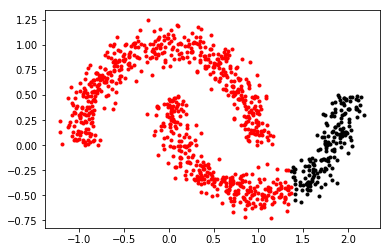

0.15
609.909191438


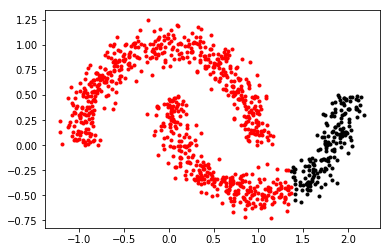

0.11
602.905451164


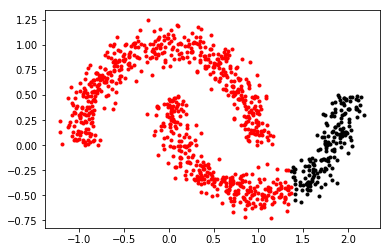

0.1
573.916652742


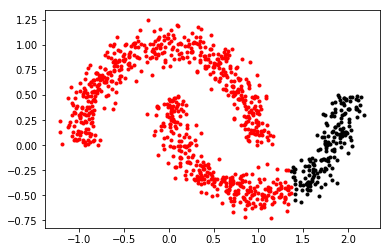

1
554.780328854


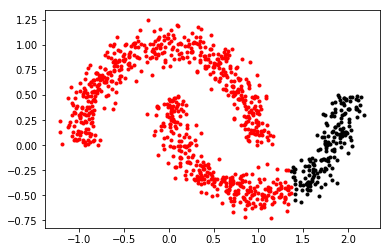

In [777]:
parameter = [ 0.17,0.15,0.11,0.1,1]
k = 2
for c in parameter:
    print(c)
    clusterAss3 = kernelized_kmeans(data, 2, rbf_kernel,c)
    plotResult(x, y, clusterAss2, 2)


clusterAss1 = kernelized_kmeans(data, 2, linear_kernel,0)
clusterAss2 = kernelized_kmeans(data, 2, quadratic_kernel,0)
clusterAss3 = kernelized_kmeans(data, 2, rbf_kernel,0.1)

plotResult(x, y, clusterAss1, 2)
plotResult(x, y, clusterAss2, 2)
plotResult(x, y, clusterAss3, 2)